In [1]:
from utils_Tu import make_masks_scipy
segmentation = r"Z:\datasets\BCP\Example_BCP_intermediates\sub-100619\output_Tu\MNINonLinear\ROIs\wmparc.2.nii.gz"
wm_mask_out = r"Z:\datasets\BCP\Example_BCP_intermediates\sub-100619\output_Tu\MNINonLinear\wm_2mm_output_Tu_mask_scipyunsmoothed.nii.gz"
vent_mask_out = r"Z:\datasets\BCP\Example_BCP_intermediates\sub-100619\output_Tu\MNINonLinear\vent_2mm_output_Tu_mask_scipyunsmoothed.nii.gz"
make_masks_scipy(segmentation, wm_mask_out, vent_mask_out, 2)

here
(91, 109, 91)


In [22]:
import subprocess
def mean_roi_signal(fmri, mask, output, fmri_res=2., roi_res=2.):
    """
    :param fmri: path to fmri nifti
    :param mask: path to mask/roi nifti
    :param output: output text file of time series of mean values within the
    mask/roi
    :return: None
    """
    cmd = 'fslmeants -i {fmri} -o {output} -m {mask}'
    if fmri_res != roi_res:
        resamplecmd = 'flirt -interp nearestneighbour -in {mask} -ref ' \
                      '{fmri} -applyxfm -out {mask}'
        resamplecmd = resamplecmd.format(fmri=fmri, output=output, mask=mask,
                                         fmri_res=fmri_res)
        subprocess.call(resamplecmd.split())
    cmd = cmd.format(fmri=fmri, output=output, mask=mask)
    print(cmd.split())
    subprocess.call(cmd.split())

wm_mask_out = "/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/wm_2mm_output_Tu_mask_scipyeroded.nii.gz"
vent_mask_out = "/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/vent_2mm_output_Tu_mask_scipyeroded.nii.gz"

volume_path = "/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/MNINonLinear/Results/ses-17mo_task-rest_run-001/ses-17mo_task-rest_run-001.nii.gz"
output =  "/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/Results/ses-17mo_task-rest_run-001/ses-17mo_task-rest_run-001_wmmean_scipy_eroded.txt"
mean_roi_signal(volume_path,wm_mask_out,output,2,2)
output =  "/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/Results/ses-17mo_task-rest_run-001/ses-17mo_task-rest_run-001_ventmean_scipy_eroded.txt"
mean_roi_signal(volume_path,vent_mask_out,output,2,2)

['fslmeants', '-i', '/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/MNINonLinear/Results/ses-17mo_task-rest_run-001/ses-17mo_task-rest_run-001.nii.gz', '-o', '/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/Results/ses-17mo_task-rest_run-001/ses-17mo_task-rest_run-001_wmmean_scipy_eroded.txt', '-m', '/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/wm_2mm_output_Tu_mask_scipyeroded.nii.gz']


['fslmeants', '-i', '/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/MNINonLinear/Results/ses-17mo_task-rest_run-001/ses-17mo_task-rest_run-001.nii.gz', '-o', '/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/Results/ses-17mo_task-rest_run-001/ses-17mo_task-rest_run-001_ventmean_scipy_eroded.txt', '-m', '/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/vent_2mm_output_Tu_mask_scipyeroded.nii.gz']


In [23]:
import numpy as np
import matplotlib.pyplot as plt
wm_scipysmoothed = np.loadtxt("/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/Results/ses-17mo_task-rest_run-001/ses-17mo_task-rest_run-001_wmmean_scipy_smoothed.txt")
wm_fslmaths = np.loadtxt("/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/Results/ses-17mo_task-rest_run-001/DCANBOLDProc_vTu1.0/ses-17mo_task-rest_run-001_wm_mean.txt")
wm_dcan = np.loadtxt("/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/MNINonLinear/Results/ses-17mo_task-rest_run-001/DCANBOLDProc_v4.0.0/ses-17mo_task-rest_run-001_wm_mean.txt")

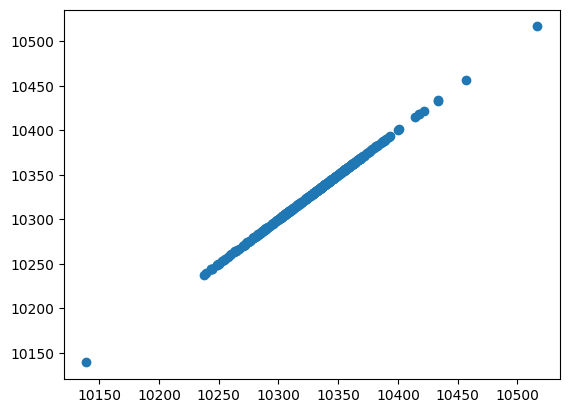

In [25]:
plt.scatter(wm_scipyeroded,wm_scipysmoothed)

In [3]:
import nibabel as nib
vent_mask_DCAN = nib.load('/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/MNINonLinear/vent_2mm_100619_mask_eroded.nii.gz')
vent_mask_DCAN = vent_mask_DCAN.get_fdata()
vent_mask_Tu = nib.load('/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/output_Tu/MNINonLinear/vent_2mm_output_Tu_mask_eroded.nii.gz')
vent_mask_Tu = vent_mask_Tu.get_fdata()

In [7]:
import numpy as np
np.sum(np.abs(vent_mask_Tu-vent_mask_DCAN))

0.0

In [8]:
volumedata = nib.load('/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/MNINonLinear/Results/ses-17mo_task-rest_run-001/ses-17mo_task-rest_run-001_2MNI.nii.gz')
volumedata = volumedata.get_fdata()

In [18]:
mask = vent_mask_Tu.reshape(-1,)
print(mask.shape)

(902629,)


In [19]:
meansig = np.mean(volumedata[mask==1,:],axis = 0)

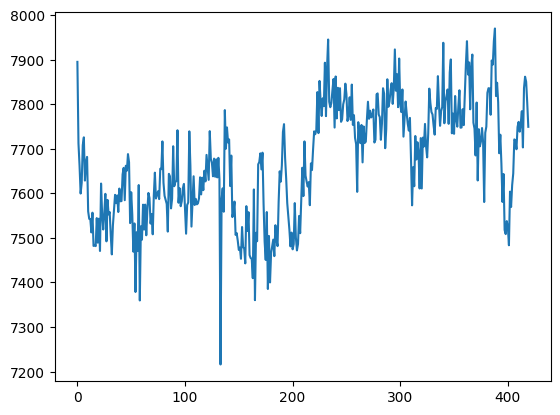

In [21]:
from matplotlib import pyplot as plt
plt.plot(meansig)
plt.show()

In [ ]:
volumedata = nib.load('/data/wheelock/data1/datasets/BCP/Example_BCP_intermediates/sub-100619/MNINonLinear/Results/ses-17mo_task-rest_run-001/ses-17mo_task-rest_run-001.nii.gz')
volumedata = volumedata.get_fdata().reshape(-1,420)
mask = vent_mask_Tu.reshape(-1,)
meansig = np.mean(volumedata[mask==1,:],axis = 0)
from matplotlib import pyplot as plt
plt.plot(meansig)
plt.show()